# 2. Statsmodels autocorrelation function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 2: Correlated Behavior?

Now that we have three years of data, we want to see if there is a trend in our behavior. We can take the correlation concepts we learned in Q1 and see if there is a relationship from one month to the next. In other words: if we spend a lot of coins one month, is the _probability_ that we spend a lot of coins the next month _higher_? Evaluating correlation this way has many names: autocorrelation, autocovariance, etc...the "auto" in this case refers to evaluating the relationship between data from the same sequence (you will learn about it more in the time series reading). Luckily, there is a built-in method of `statsmodels` that does this for us automatically: the correlation is plotted on the y-axis, as a function of the 'distance' between two points in the series. It is important to recognize that the correlations represent any point in the series (analogous to an average), rather than any specific point)

_Note the use of reshape to put the data back into a 1D array (row/column)!_

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.1:}$

Run the cells to visualize the plots, then read the interpretations. Do you get an error loading statsmodels? Run it from a new environment with the provided [`environment.yml`](./environment.yml) (instructions in the [book](https://mude.citg.tudelft.nl/book/2025/_git/github.com_TeachBooks_learn-programming/mude-2025/book/environments.html#how-to-create-and-environment)) or install it manually using `conda install statsmodels`.
</p>
</div>

In [2]:
coins = [46, 28, 16, 27,
         22, 24, 31, 12,
         32, 36, 12, 0,
         41, 27, 21, 26,
         21, 19, 18, 35,
         14, 34, 8, 0,
         53, 34, 23, 35,
         28, 26, 18, 13,
         12, 14, 34, 0]

coins_matrix = np.reshape(coins, (3, 12))

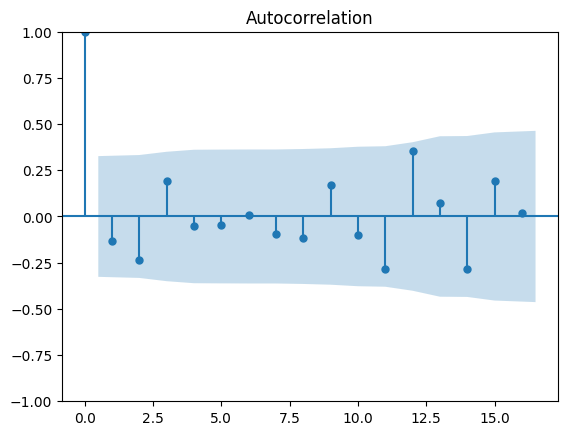

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(coins_matrix.reshape(-1));


**Interpretation:** it appears that there is little correlation from one month to the next in the data set, except each point is very strongly correlated with itself (that should be obvious!). Even more importantly, the points are inside the shaded blue region: that is the confidence interval, which means the values are negligible.

Now let's try an increasing series and see what happens:

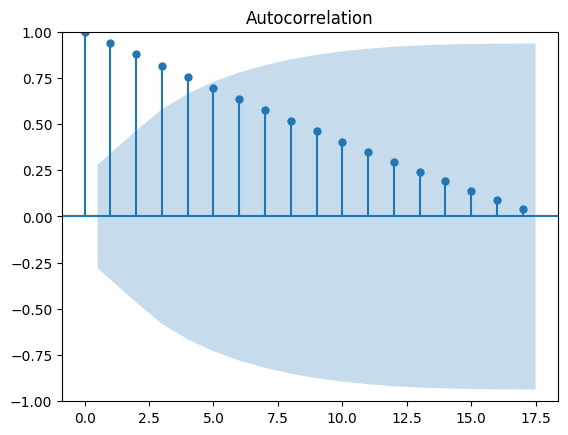

In [4]:
increasing_series = np.arange(1, 50)
plot_acf(increasing_series);

**Interpretation:**  now there is definitely correlation! And we see that the correlation drops off with distance (which makes sense for a linear trend). However, the confidence interval is large, so the trend in correlation should not be trusted for a large distance (you can check and set the confidence interval easily, check the [documentation](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)).


<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%"> <p>

$\text{Tip:}$

Note that we don't give a full explanation of the x-axis in these plots, and the terminology for correlation is vague; see the reading for a thorough explanation. 
</p></div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.2:}$
    
Test your knowledge of correlation! See if you can create a sequence of data that somehow creates alternating positive and negative values of autocorrelation, as illustrated in the figure.

<img src="https://github.com/TUDelft-MUDE/source-files/raw/main/file/PA2.4/alternation.svg" alt="Alternating autocorrelation figure"/>

</p>
</div>

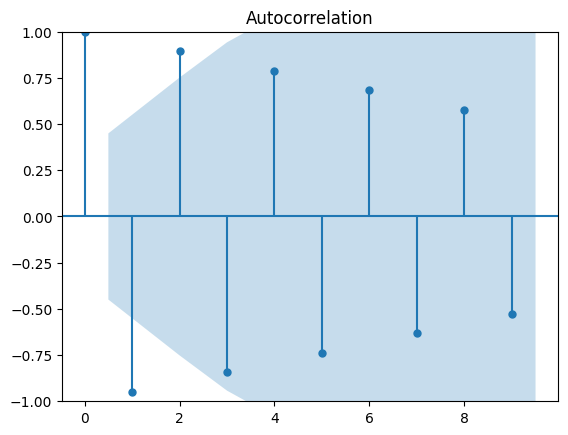

In [5]:
strong_autocorr_positive = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1 ,1])
plot_acf(strong_autocorr_positive);

> By Robert Lanzafame, Delft University of Technology. CC BY 4.0, more info [on the Credits page of Workbook](https://mude.citg.tudelft.nl/workbook-2025/credits.html).